# Generators

In [1]:
def exp_series(x, n):
    
    # exp(x) = \sum_k x^k / k!
    
    numerator, denominator = 1, 1
    for k in range(n):
        yield numerator / denominator
        k += 1
        numerator *= x
        denominator *= k

In [2]:
list(exp_series(3, 5))

[1.0, 3.0, 4.5, 4.5, 3.375]

# Pandas Basics

In [3]:
import pandas as pd
import numpy as np

## Series

In [5]:
pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])

a    0.857711
b    0.432767
c    0.874169
d    0.213357
e    0.756756
dtype: float64

In [6]:
pd.Series({'a': 1, 'b': 2})

a    1
b    2
dtype: int64

### Data Access

In [7]:
s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])

In [8]:
s[1]

0.44730436800110707

In [9]:
s['a']

0.8887966043335263

In [10]:
'b' in s

True

In [11]:
s['f'] # careful

KeyError: 'f'

In [12]:
s.get('f', float('nan'))

nan

In [13]:
{}['a']

KeyError: 'a'

In [14]:
{}.get('f', float('nan'))

nan

In [15]:
s.array

<PandasArray>
[ 0.8887966043335263, 0.44730436800110707,  0.4555208978742663,
  0.4838118537148538,  0.1372134278676832]
Length: 5, dtype: float64

### Why Series?

In [16]:
[0.56, 42, 'foo', []]

[0.56, 42, 'foo', []]

In [17]:
s['a'] = []

ValueError: setting an array element with a sequence.

## Arithmetic

In [18]:
s + 12

a    12.888797
b    12.447304
c    12.455521
d    12.483812
e    12.137213
dtype: float64

In [19]:
[i + 12 for i in [1,2,3,4,5]]

[13, 14, 15, 16, 17]

In [20]:
s + s[1:]

a         NaN
b    0.894609
c    0.911042
d    0.967624
e    0.274427
dtype: float64

In [21]:
(s + s[1:]).dropna()

b    0.894609
c    0.911042
d    0.967624
e    0.274427
dtype: float64

In [23]:
np.exp(s)

a    2.432201
b    1.564090
c    1.576995
d    1.622246
e    1.147073
dtype: float64

In [25]:
s['c':]

c    0.455521
d    0.483812
e    0.137213
dtype: float64

In [26]:
s['c'::-1]

c    0.455521
b    0.447304
a    0.888797
dtype: float64

## Plotting

<AxesSubplot:>

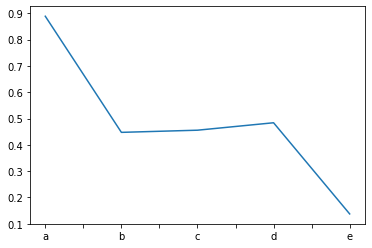

In [27]:
s.plot.line()

<AxesSubplot:>

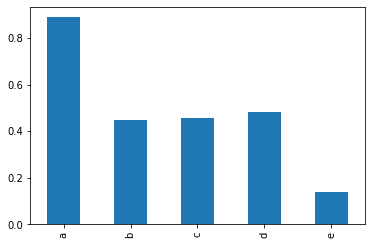

In [28]:
s.plot.bar()

In [29]:
import matplotlib.pyplot as plt

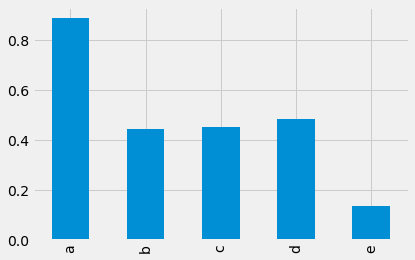

In [30]:
with plt.style.context('fivethirtyeight'):
    s.plot.bar()

## Time series

We won't cover time series here, have a look at the Pandas time series API if/when you have the time.

## Data Frames

In [32]:
noble_gasses = pd.DataFrame(
    {'Atomic Number': [2,10, 18, 32],
     'Atomic Radius': [31, 38, 72, 88]},
     index=['He', 'Ne', 'Ar', 'Kr'])

In [33]:
noble_gasses

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,72
Kr,32,88


### Accessing Data

In [35]:
noble_gasses['Atomic Number'] # always do this

He     2
Ne    10
Ar    18
Kr    32
Name: Atomic Number, dtype: int64

In [39]:
noble_gasses[['Atomic Number', 'Atomic Radius']]

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,72
Kr,32,88


In [36]:
noble_gasses.size

8

In [37]:
noble_gasses.loc['He']

Atomic Number     2
Atomic Radius    31
Name: He, dtype: int64

In [40]:
noble_gasses.loc['He': 'Ar']

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,72


In [41]:
noble_gasses.loc['He': 'Ar', 'Atomic Radius']

He    31
Ne    38
Ar    72
Name: Atomic Radius, dtype: int64

### Filtering

In [42]:
noble_gasses['Atomic Number'] > 10

He    False
Ne    False
Ar     True
Kr     True
Name: Atomic Number, dtype: bool

In [43]:
noble_gasses[noble_gasses['Atomic Number'] > 10]

,Atomic Number,Atomic Radius
Ar,18,72
Kr,32,88


### Sampling

In [44]:
noble_gasses.sample(2)

,Atomic Number,Atomic Radius
He,2,31
Ar,18,72


In [45]:
noble_gasses.sample(10, replace=True)

,Atomic Number,Atomic Radius
He,2,31
Kr,32,88
Kr,32,88
Kr,32,88
Ar,18,72
Ar,18,72
Ne,10,38
Ne,10,38
Ne,10,38
Ne,10,38


## Shape-Shifting

In [46]:
noble_gasses

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,72
Kr,32,88


In [47]:
noble_gasses.T

,He,Ne,Ar,Kr
Atomic Number,2,10,18,32
Atomic Radius,31,38,72,88


<AxesSubplot:>

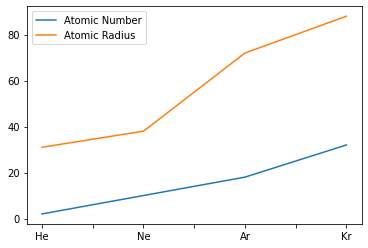

In [48]:
noble_gasses.plot()

<AxesSubplot:>

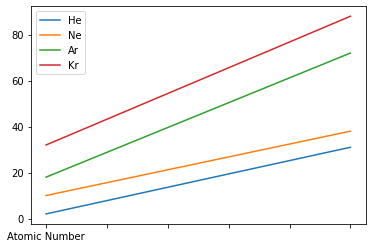

In [49]:
noble_gasses.T.plot()

In [50]:
noble_gasses.stack()

He  Atomic Number     2
    Atomic Radius    31
Ne  Atomic Number    10
    Atomic Radius    38
Ar  Atomic Number    18
    Atomic Radius    72
Kr  Atomic Number    32
    Atomic Radius    88
dtype: int64

In [51]:
noble_gasses.stack().unstack()

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,72
Kr,32,88


In [52]:
# Homework: pivot

## Missing Data

In [53]:
# Careful: Why is data missing

In [54]:
noble_gasses['foo'] = pd.Series({'Ar': 5, 'He': 2})

In [55]:
noble_gasses

,Atomic Number,Atomic Radius,foo
He,2,31,2.0
Ne,10,38,NaN
Ar,18,72,5.0
Kr,32,88,NaN


In [57]:
noble_gasses.dropna()

,Atomic Number,Atomic Radius,foo
He,2,31,2.0
Ar,18,72,5.0


In [58]:
noble_gasses.isna()

,Atomic Number,Atomic Radius,foo
He,False,False,False
Ne,False,False,True
Ar,False,False,False
Kr,False,False,True


In [60]:
noble_gasses.isna().sum()

Atomic Number    0
Atomic Radius    0
foo              2
dtype: int64

In [61]:
noble_gasses.fillna(1.2)

,Atomic Number,Atomic Radius,foo
He,2,31,2.0
Ne,10,38,1.2
Ar,18,72,5.0
Kr,32,88,1.2


In [62]:
noble_gasses.fillna(noble_gasses.mean())

,Atomic Number,Atomic Radius,foo
He,2,31,2.0
Ne,10,38,3.5
Ar,18,72,5.0
Kr,32,88,3.5


In [65]:
noble_gasses.isna()['foo']

He    False
Ne     True
Ar    False
Kr     True
Name: foo, dtype: bool

In [66]:
noble_gasses['foo_missing'] = noble_gasses.isna()['foo']

In [67]:
noble_gasses

,Atomic Number,Atomic Radius,foo,foo_missing
He,2,31,2.0,False
Ne,10,38,NaN,True
Ar,18,72,5.0,False
Kr,32,88,NaN,True


In [68]:
noble_gasses['foo_missing'] = noble_gasses.isna()['foo'] * 1 # lazy substitute for ...astype(int)

In [69]:
noble_gasses

,Atomic Number,Atomic Radius,foo,foo_missing
He,2,31,2.0,0
Ne,10,38,NaN,1
Ar,18,72,5.0,0
Kr,32,88,NaN,1


## Combining Data

Homework: Look at `join`, `concat`